In [1]:
import re
import jieba
import sys
import matplotlib
import jieba.posseg as ps
from nltk import *
from matplotlib import rcParams
from matplotlib.font_manager import findfont, FontProperties, _rebuild
from universalMethod import *
import time

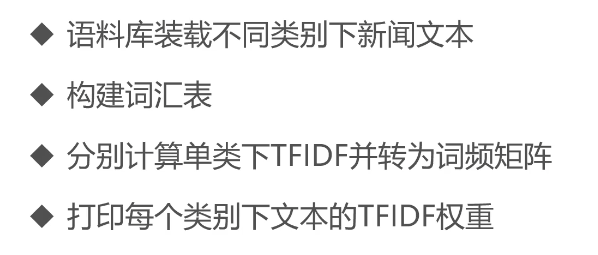

In [2]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# 利用sklearn计算tfidf值特征
# (第x类的第x个词) --- 频率
# (0, 188)	0.03857512064629453
# (0, 187)	0.03857512064629453
# (0, 185)	0.03857512064629453
# (0, 183)	0.03857512064629453
# (0, 182)	0.03857512064629453
# (0, 181)	0.5014765684018289
#  :    :
# (1, 90)	0.27149863554608433
# (1, 88)	0.06787465888652108
# (1, 86)	0.13574931777304217
# (1, 84)	0.06787465888652108
# (1, 83)	0.04829337882168004
def sklearn_tfidf_feature(corpus=None):
    # 构建词汇表
    vectorizer = CountVectorizer()
    # 该类会统计每个词语的tf-idf权值
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
    # 获取词袋模型中的所有词语
    words = vectorizer.get_feature_names()
    # 将tf-idf矩阵抽取出来, 元素a[i][j]表示j词在i类文本中的权重
    weight = tfidf.toarray()
    print(weight)
    for i in range(len(weight)):
        print(u"----这里输出第", i, u"类文本的词语tf-idf权重")
        for j in range(len(words)):
            print(words[j], weight[i][j])

In [5]:
if __name__ == '__main__':
    
    corpus = []
    sT = time.time()
    path1 = r'../CSCMNews/体育/0.txt'
    str_doc1 = readFile(path1)
    word_list1 = ' '.join(seg_doc(str_doc1))
#     print(word_list1)
#     print('-------------------------')
    path2 = r'../CSCMNews/时政/339764.txt'
    str_doc2 = readFile(path2)
    word_list2 = ' '.join(seg_doc(str_doc2))
#     print(word_list2)
    
    corpus.append(word_list1)
    corpus.append(word_list2)
    print(corpus)
    sklearn_tfidf_feature(corpus)
    eT = time.time()
    print('total time: %.2f' %(eT - sT) + ' s')

['马晓旭 意外 受伤 国奥 警惕 无奈 大雨 格外 青睐 殷家 记者 傅亚雨 沈阳 报道 来到 沈阳 国奥队 依然 没有 摆脱 雨水 困扰 下午 国奥队 日常 训练 再度 大雨 干扰 无奈 之下 队员 慢跑 分钟 草草收场 上午 国奥队 奥体中心 外场 训练 阴沉沉 气象预报 显示 当天 下午 沈阳 大雨 幸好 队伍 上午 训练 没有 干扰 下午 球队 抵达 训练场 大雨 已经 几个 小时 丝毫 没有 停下来 意思 试一试 态度 球队 当天 下午 例行 训练 分钟 过去 天气 没有 转好 迹象 保护 球员 国奥队 决定 中止 当天 训练 全队 立即 返回 酒店 训练 足球队 稀罕 奥运会 即将 之前 全队 变得 娇贵 沈阳 最后 一周 训练 国奥队 保证 现有 球员 不再 出现意外 伤病 情况 影响 正式 比赛 这一 阶段 控制 训练 受伤 控制 感冒 疾病 出现 队伍 放在 相当 重要 位置 抵达 沈阳 之后 后卫 冯萧霆 一直 没有 训练 冯萧霆 长春 患上 感冒 没有 参加 塞尔维亚 热身赛 队伍 介绍 冯萧霆 没有 出现 发烧 症状 安全 两天 静养 休息 感冒 彻底 之后 恢复 训练 冯萧霆 例子 国奥队 对雨中 训练 显得 特别 谨慎 主要 担心 球员 受凉 引发 感冒 造成 非战斗 减员 女足 队员 马晓旭 热身赛 受伤 导致 无缘 奥运 前科 沈阳 国奥队 现在 格外 警惕 训练 不断 嘱咐 队员 注意 动作 不能 再出 事情 一位 工作人员 表示 长春 沈阳 雨水 一路 伴随 国奥队 长春 几次 训练 大雨 搅和 没想到 沈阳 碰到 这种 事情 一位 国奥 球员 雨水 青睐 不解', '美国 马来西亚 海军 南中国海 集结 举行 联合 军演 环球时报 特约记者 唐湘 报道 马来西亚 吉隆坡 安全 评论 网站 报道 卡拉 马来西亚 演习 阶段 已经 展开 美方 调动 官兵 神盾 反潜巡逻机 大黄蜂 战机 参演 马美 国海军 舰队 已经 集结 南中国海 展开 系列 海上 编队 操演 海上 编队 操演 联合 登陆 演习 整个 卡拉 演习 高潮 节目 参演 马方 舰船 乐吉尔 导弹 护卫舰 高手 导弹 攻击 快艇 斯里 德拉 沙迪 多功能 支援 指挥舰 美方 神盾 霞飞 钟云 为期 演习 马美 国海军 舰队 南中国海 展开 舰炮 射击 水下 作战 潜水 